# Task 1 - Prediction using Supervised Learning

## By Palegar Nikhil

### Simple Linear Regression

Predict the percentage of marks that a student is expected to score based upon the number of hours they studied. 

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Importing Dataset

In [2]:
url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df=pd.read_csv(url)
print('Data Downloaded')
df.head()

Data Downloaded


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.shape

(25, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


(0, 102.0606092567361)

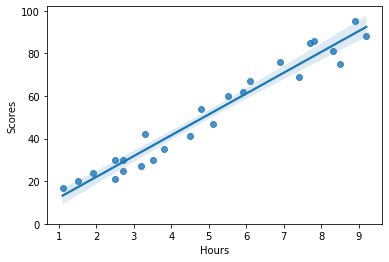

In [7]:
import seaborn as sns
sns.regplot(x='Hours',y='Scores',data=df)
plt.ylim(0,)

### Preparing the Data

In [8]:
X=df.iloc[:,:-1].values
Y=df.iloc[:,1:].values

In [9]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

### Training the Algorithm

In [10]:
lm=LinearRegression()
lm.fit(X_train,Y_train)
print("Intercept:",lm.intercept_)
print("Slope:",lm.coef_)

Intercept: [2.37081538]
Slope: [[9.78856669]]


### Testing the Algorithm

In [11]:
Y_pred=lm.predict(X_test)

In [12]:
df_com=pd.DataFrame({'Predictor_data' : X_test.flatten() , 'Target_Actual' : Y_test.flatten() , 'Target_Predicted' : Y_pred.flatten()})
df_com

,Predictor_data,Target_Actual,Target_Predicted
0,1.5,20,17.053665
1,3.2,27,33.694229
2,7.4,69,74.806209
3,2.5,30,26.842232
4,5.9,62,60.123359
5,3.8,35,39.567369
6,1.9,24,20.969092
7,7.8,86,78.721636


### Predicting Score 

In [13]:
hour=[9.25]
score_pred=lm.predict([hour])
print('Hours={}'.format(hour))
print('Predicted score={}'.format(score_pred[0]))

Hours=[9.25]
Predicted score=[92.91505723]


### Evaluating the Algorithm

In [14]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [15]:
print('R2 Score:{}'.format(r2_score(Y_test,Y_pred)))
print('Mean Squared Error:',mean_squared_error(Y_test,Y_pred))

R2 Score:0.9568211104435257
Mean Squared Error: 22.96509721270043
